In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_clasificaciones=pd.read_csv('qualifying - qualifying.csv',delimiter=',')
df_pilotos=pd.read_csv('drivers - drivers.csv',delimiter=',')
df_circuitos=pd.read_csv('circuits.csv',delimiter=',')
df_resultados=pd.read_csv('results - results.csv',delimiter=',')
df_races=pd.read_csv('races.csv',delimiter=',')
df_2022=pd.read_csv('2022 Overtakes Data - Sheet1.csv',delimiter=',')
df_2021=pd.read_csv('2021 Overtakes Data - Sheet1.csv',delimiter=',')
df_2020=pd.read_csv('2020 Overtakes  - Sheet1.csv',delimiter=',')
df_2019=pd.read_csv('2019 Overtakes - Sheet1.csv',delimiter=',')
df_2018=pd.read_csv('_2018 Overtakes - Sheet1.csv',delimiter=',')
df_2017=pd.read_csv('2017 Overtakes - Sheet1.csv',delimiter=',')
df_2016=pd.read_csv('2016 Overtakes - Sheet1.csv',delimiter=',')
df_2015=pd.read_csv('2015 Overtakes  - Sheet1.csv',delimiter=',')
df_2014=pd.read_csv('_2014 Overtakes - Sheet1.csv',delimiter=',')
df_races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [25]:
df = pd.merge(df_resultados, df_races, on='raceId')
df['adelantamientos'] = df['grid'] - df['positionOrder']
adelantamientos_por_circuito = df.groupby('name')['adelantamientos'].mean()
circuito_mas_propenso = adelantamientos_por_circuito.sort_values(ascending=False).index[0]
circuito_menos_propenso = adelantamientos_por_circuito.sort_values().index[0]
circuito_menos_propenso

'Caesars Palace Grand Prix'

In [20]:
import pandas as pd
# Convertir la columna date del dataframe races en un objeto datetime y seleccionar solo los datos desde 2014
df_races['date'] = pd.to_datetime(df_races['date'])
df_races = df_races[df_races['date'].dt.year >= 2014]

# Filtrar los resultados del dataframe resultados que corresponden a carreras desde 2014
df_resultados = df_resultados[df_resultados['raceId'].isin(df_races['raceId'])]

# Unir los dataframes utilizando la columna raceId
df = pd.merge(df_resultados, df_races, on='raceId')

# Calcular la cantidad de adelantamientos por carrera
df['adelantamientos'] = df['grid'] - df['positionOrder']

# Agrupar los datos por el nombre del circuito y calcular la media de adelantamientos por carrera
adelantamientos_por_circuito = df.groupby('name')['adelantamientos'].mean()

# Ordenar los circuitos de mayor a menor promedio de adelantamientos
circuito_mas_propenso = adelantamientos_por_circuito.sort_values(ascending=False).index[0]
circuito_menos_propenso = adelantamientos_por_circuito.sort_values().index[0]

print(f"El circuito más propenso a adelantamientos desde 2014 es: {circuito_mas_propenso}")
print(f"El circuito menos propenso a adelantamientos desde 2014 es: {circuito_menos_propenso}")


El circuito más propenso a adelantamientos desde 2014 es: 70th Anniversary Grand Prix
El circuito menos propenso a adelantamientos desde 2014 es: Miami Grand Prix


name
70th Anniversary Grand Prix    0.000000
Mexican Grand Prix             0.000000
Abu Dhabi Grand Prix           0.000000
Portuguese Grand Prix          0.000000
German Grand Prix              0.000000
Qatar Grand Prix               0.000000
European Grand Prix            0.000000
Eifel Grand Prix               0.000000
Sakhir Grand Prix              0.000000
Mexico City Grand Prix         0.000000
Tuscan Grand Prix              0.000000
Bahrain Grand Prix            -0.059783
Spanish Grand Prix            -0.108696
Russian Grand Prix            -0.116564
Canadian Grand Prix           -0.138889
Singapore Grand Prix          -0.138889
Japanese Grand Prix           -0.138889
Brazilian Grand Prix          -0.142857
Chinese Grand Prix            -0.161290
British Grand Prix            -0.217391
Australian Grand Prix         -0.232394
United States Grand Prix      -0.250000
French Grand Prix             -0.250000
Malaysian Grand Prix          -0.261905
Italian Grand Prix            -0.26

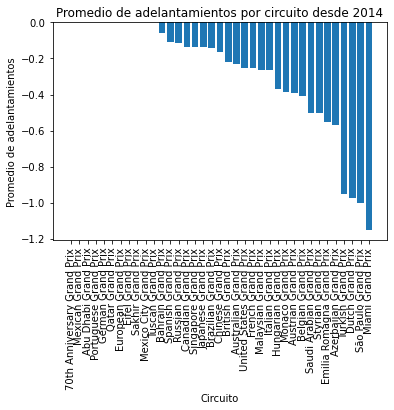

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna date del dataframe races en un objeto datetime y seleccionar solo los datos desde 2014
df_races['date'] = pd.to_datetime(df_races['date'])
df_races = df_races[df_races['date'].dt.year >= 2014]

# Filtrar los resultados del dataframe resultados que corresponden a carreras desde 2014
df_resultados = df_resultados[df_resultados['raceId'].isin(df_races['raceId'])]

# Unir los dataframes utilizando la columna raceId
df = pd.merge(df_resultados, df_races, on='raceId')

# Calcular la cantidad de adelantamientos por carrera
df['adelantamientos'] = df['grid'] - df['positionOrder']

# Agrupar los datos por el nombre del circuito y calcular la media de adelantamientos por carrera
adelantamientos_por_circuito = df.groupby('name')['adelantamientos'].mean()

# Ordenar los circuitos de mayor a menor promedio de adelantamientos
adelantamientos_por_circuito = adelantamientos_por_circuito.sort_values(ascending=False)

# Imprimir el resultado
print(adelantamientos_por_circuito)

# Graficar los resultados
plt.bar(adelantamientos_por_circuito.index, adelantamientos_por_circuito.values)
plt.xticks(rotation=90)
plt.xlabel('Circuito')
plt.ylabel('Promedio de adelantamientos')
plt.title('Promedio de adelantamientos por circuito desde 2014')
plt.show()


name
Eifel Grand Prix               2.850000
Sakhir Grand Prix              2.550000
German Grand Prix              2.261905
Azerbaijan Grand Prix          2.250000
Emilia Romagna Grand Prix      2.216667
Turkish Grand Prix             2.175000
Tuscan Grand Prix              2.150000
Malaysian Grand Prix           2.095238
Singapore Grand Prix           2.027778
United States Grand Prix       2.000000
European Grand Prix            2.000000
Brazilian Grand Prix           1.978571
Qatar Grand Prix               1.950000
Italian Grand Prix             1.907609
Hungarian Grand Prix           1.902174
Belgian Grand Prix             1.875000
Russian Grand Prix             1.865031
Austrian Grand Prix            1.847826
Australian Grand Prix          1.845070
Bahrain Grand Prix             1.842391
Miami Grand Prix               1.800000
Styrian Grand Prix             1.700000
British Grand Prix             1.695652
Canadian Grand Prix            1.625000
Monaco Grand Prix              1.62

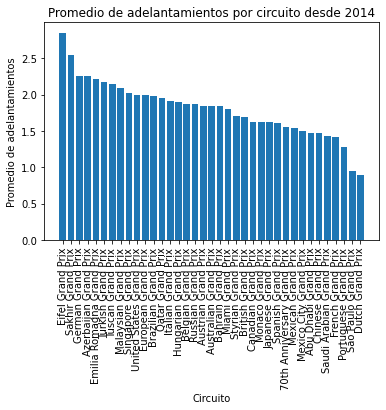

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna date del dataframe races en un objeto datetime y seleccionar solo los datos desde 2014
df_races['date'] = pd.to_datetime(df_races['date'])
df_races = df_races[df_races['date'].dt.year >= 2014]

# Filtrar los resultados del dataframe resultados que corresponden a carreras desde 2014
df_resultados = df_resultados[df_resultados['raceId'].isin(df_races['raceId'])]

# Unir los dataframes utilizando la columna raceId
df = pd.merge(df_resultados, df_races, on='raceId')

# Calcular la cantidad de adelantamientos por carrera
df['adelantamientos'] = df['grid'] - df['positionOrder']
df.loc[df['adelantamientos'] < 0, 'adelantamientos'] = 0

# Agrupar los datos por el nombre del circuito y calcular la media de adelantamientos por carrera
adelantamientos_por_circuito = df.groupby('name')['adelantamientos'].mean()

# Ordenar los circuitos de mayor a menor promedio de adelantamientos
adelantamientos_por_circuito = adelantamientos_por_circuito.sort_values(ascending=False)

# Imprimir el resultado
print(adelantamientos_por_circuito)

# Graficar los resultados
plt.bar(adelantamientos_por_circuito.index, adelantamientos_por_circuito.values)
plt.xticks(rotation=90)
plt.xlabel('Circuito')
plt.ylabel('Promedio de adelantamientos')
plt.title('Promedio de adelantamientos por circuito desde 2014')
plt.show()


           resultId       raceId     driverId  constructorId_x         grid  \
count   9575.000000  9575.000000  9575.000000      9575.000000  9575.000000   
mean   14513.365849   576.919582   303.456710        43.515509    11.150705   
std    10141.089188   418.409302   377.386772        69.892314     6.324717   
min        1.000000     1.000000     1.000000         1.000000     0.000000   
25%     3352.500000   116.500000    15.000000         4.000000     6.000000   
50%    21030.000000   851.000000    49.000000         9.000000    11.000000   
75%    23442.500000   972.000000   817.000000        25.000000    16.000000   
max    25845.000000  1096.000000   856.000000       214.000000    26.000000   

       positionOrder       points         laps     statusId  driverName  \
count    9575.000000  9575.000000  9575.000000  9575.000000         0.0   
mean       11.281358     3.417232    51.119791     9.425065         NaN   
std         6.315863     5.907994    20.002077    16.942535    

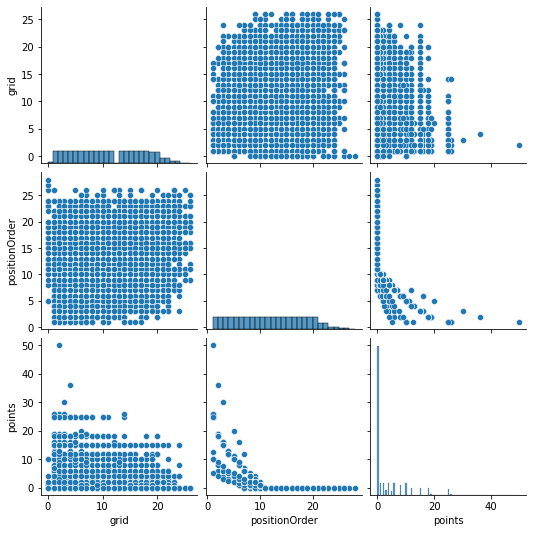

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Unir los datos de las diferentes tablas utilizando los id's de cada una de ellas
df = pd.merge(df_resultados, df_races, on='raceId')
df = pd.merge(df, df_clasificaciones, on=['raceId', 'driverId'])

# Realizar un análisis exploratorio de los datos
print(df.describe())
sns.pairplot(df[['grid', 'positionOrder', 'points', 'fastestLapTime']])
plt.show()


In [10]:
!pip install folium

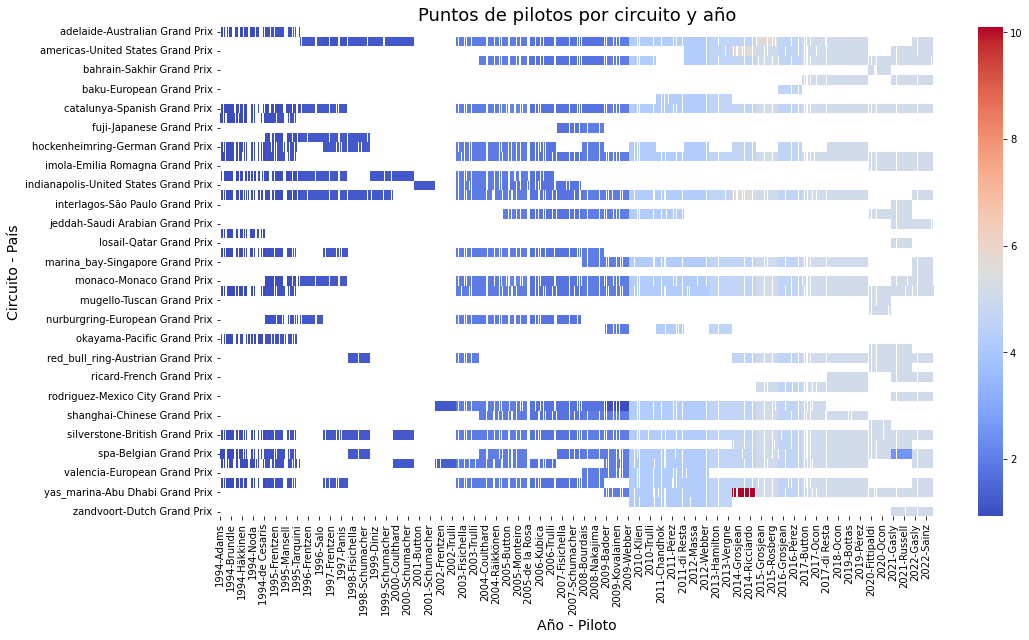

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Unir los dataframes
df_combinado = pd.merge(df_clasificaciones, df_pilotos, on='driverId')
df_combinado = pd.merge(df_combinado, df_races, on='raceId')
df_combinado = pd.merge(df_combinado, df_circuitos, on='circuitId')
df_combinado = pd.merge(df_combinado, df_resultados,on='raceId')

df_combinado = df_combinado[['circuitRef', 'name_x', 'year', 'forename', 'surname', 'points']]

# Renombrar columnas
df_combinado = df_combinado.rename(columns={
    'circuitRef': 'Circuito',
    'name_x': 'Pais',
    'year': 'Año',
    'forename': 'Nombre',
    'surname': 'Apellido',
})

# Crear tabla pivote
heatmap_data = pd.pivot_table(df_combinado, values='points', index=['Circuito', 'Pais'], columns=['Año', 'Apellido'])

# Crear mapa de calor
plt.figure(figsize=(16, 9))
sns.heatmap(heatmap_data, cmap='coolwarm')

# Configurar los detalles del gráfico
plt.title('Puntos de pilotos por circuito y año', fontsize=18)
plt.xlabel('Año - Piloto', fontsize=14)
plt.ylabel('Circuito - País', fontsize=14)

# Mostrar mapa de calor
plt.show()
